#        АНАЛИЗ ПРОДАЖ ПЛАТФОРМЕННЫХ ИГР 

Целью данного проекта является выявление закономерностей, определяющих успех игры, для составления прогноза на 2017 год.  
В качестве основы для анализа будем использовать датасет с историческими данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами.  
Проведем предобработку данных с дальнейшим пошаговым исследовательским анализом со всеми расчетами и визуализациями, необходимыми для выводов.  
С помощью одного из статистических методов исследования проверим две гипотезы.  
Подведем итоги и сделаем прогноз на 2017 год.


1. [Открытие данных](#open_data)
2. [Предобработка данных](#prepare_data)
    * [Обработка пропусков, изменение типов данных и регистра](#prep_1)
    * [Обработка дубликатов](#prep_2)
3. [Исследовательский анализ данных](#analysis)
    * [Распределение релизов по годам](#an_1)
    * [Распределение суммарных продаж каждой платформы по годам](#an_2)
    * [Выбор актуального периода для анализа](#an_3)
    * [Топ-5 платформ](#an_4)
    * [Влияние отзывов на продажи](#an_5)
    * [Популярность жанров](#an_6)
4. [Портрет пользователя каждого региона](#regions)
    * [Распределение продаж платформ по регионам](#reg_1)
    * [Распределение жанров по регионам](#reg_2)
    * [Продажи регионов по рейтингам ESRB](#reg_3)
5. [Проверка гипотез](#hypotheses)
    * [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#hyp_1)
    * [Средние пользовательские рейтинги жанров Action и Sports разные](#hyp_2)
6. [Общий вывод](#conclusion)

# 1. Открытие данных
<a id = "open_data"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle



In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2. Предобработка данных 
<a id = "prepare_data"></a>

**Приведем названия столбцов к нижнему регистру, год выпуска приведем к целочисленному типу данных.**
<a id = "prep_1"></a>

In [5]:
df.columns = df.columns.str.lower()

df['year_of_release'] = df['year_of_release'].astype('Int64')

В столбце "user_score" есть значения "tbd" - To be detemined, что переводится как Будет определено. Вероятно было поставлено недостаточное количество оценок для определения рейтинга.  
Заменим эти значения на NaN. И заменим тип данных на float64.

In [6]:
df['user_score'].replace('tbd', np.nan, inplace=True)
df['user_score'] = df['user_score'].fillna(0).astype('float64').replace(0, np.nan)

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Проверим наличие дубликатов**
<a id = "prep_2"></a>

In [8]:
df[df.loc[:, ['name', 'platform', 'year_of_release']].duplicated(keep=False)]  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Проверили наличие полных дубликатов по столбцам 'name', 'platform' и 'year_of_release', выявили дубликаты для игры Madden NFL 13, в одном из них нет данных о продажах, поэтому удалим его. Аналогичная ситуация с неизвестной игрой, но так как платформа и год релиза указаны, то не будем удалять обе строки.

**Удалим дубликаты, которые не несут никакой информации и создадим столбец с суммарными продажами по регионам.**

In [9]:
df = df.drop(index=[14244, 16230])  

In [10]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')

In [11]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Мы подготовили данные к последующему анализу, ознакомились с типами данных столбцов, изменили тип данных года релиза и пользовательского рейтинга на целочисленный и с плавающей точкой соответствено.  
В столбце с пользовательскими рейтингами заменили значение "tbd" на NaN, так как рейтинг неизвестен.  
Удалили два дубликата и привели названия столбцов к нижнему регистру.  
Посчитали и добавили новый столбец "total_sales" с суммарными продажами для каждой игры.  
  
  Данные к анализу готовы)

# 3. Исследовательский анализ данных
<a id = "analysis"></a>

**Выясним, сколько игр выпускалось в разные годы.**
<a id = "an_1"></a>

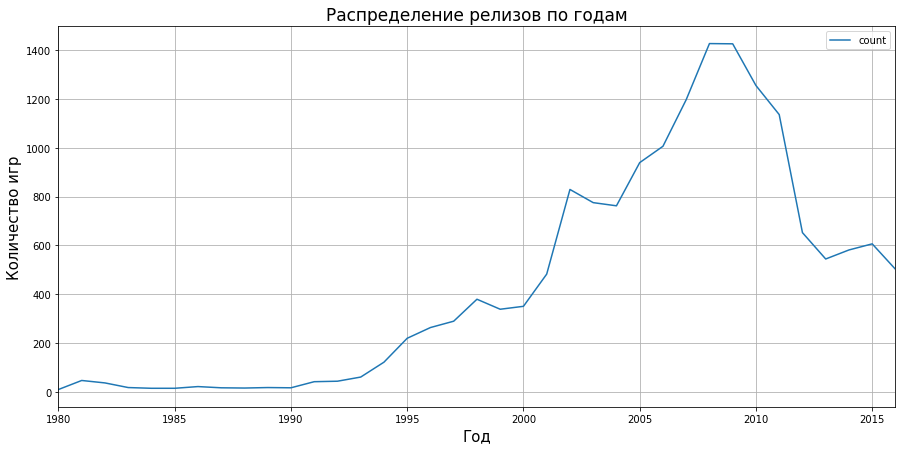

In [12]:
df_by_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
df_by_years.columns = ['year_of_release', 'count']

df_by_years.plot(x='year_of_release', grid=True, figsize=(15, 7))
plt.xlabel("Год",size=15)
plt.ylabel("Количество игр",size=15)
plt.title("Распределение релизов по годам", size=17)
plt.show()

**До 1994 года выпускалось менее 100 игр в год, эти данные можно считать незначительными и не брать в расчет.**  

In [13]:
df = df.loc[df['year_of_release'] >= 1994, :].copy()

**Выясним, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами.**

In [14]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

**Сформируем список платформ с суммарными продажами более 50млн.**

In [15]:
top_platforms_list = df.groupby('platform').sum().query('total_sales > 50').index.values.tolist()

**Сгруппируем таблицу по году выпуска игры и платформе, подсчитаем суммарные продажи и отфильтруем по составленному списку платформ**

In [16]:
df_by_platforms = df.pivot_table(
    index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum').reset_index()

df_by_platforms = df_by_platforms.loc[df_by_platforms['platform'].isin(top_platforms_list), :]

In [17]:
df_by_platforms

,year_of_release,platform,total_sales
1,1994,GB,12.18
5,1994,PC,12.87
6,1994,PS,6.03
9,1994,SNES,35.08
11,1995,GB,3.60
...,...,...,...
192,2016,PSV,4.25
193,2016,Wii,0.18
194,2016,WiiU,4.60
195,2016,X360,1.52


**Построим график распределения суммарных продаж каждой платформы по годам**
<a id = "an_2"></a>

<a id='1'></a>

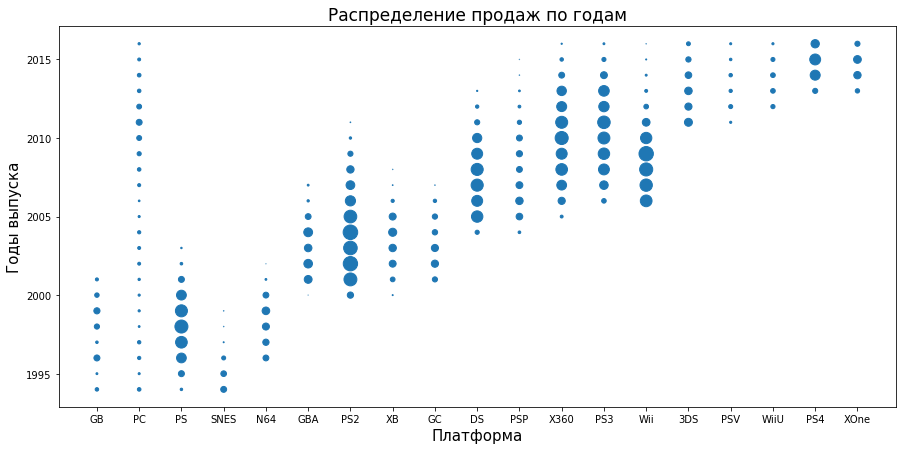

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(x = df_by_platforms['platform'], y = df_by_platforms['year_of_release'], s=df_by_platforms['total_sales'])
plt.xlabel("Платформа",size=15)
plt.ylabel("Годы выпуска",size=15)
plt.title("Распределение продаж по годам", size=17)

plt.show()

**Подсчитаем, за какой характерный срок появляются новые и исчезают старые платформы. PC не будем учитывать, так как он существует на протяжении всего времени.**
<a id = "an_3"></a>

In [19]:
platforms_life = df_by_platforms.query('platform != "PC"').groupby('platform')['year_of_release'].apply(
                                                                        lambda col: col.max() - col.min())

In [20]:
platforms_life.describe()

count    18.000000
mean      7.222222
std       2.755861
min       3.000000
25%       5.000000
50%       7.000000
75%       9.750000
max      11.000000
Name: year_of_release, dtype: float64

Примерный "срок жизни" платформы составляет 7 лет, но PC - бессмертен))

**Платформа набирает популярность в первой половине срока своего существования(примерно 3.5 года), чтобы попасть в этот тренд в 2017 году, возьмем для дальнейшего анализа данные с 2013 года. Так как данные за 2016 год неполные и насколько они неполные мы не знаем, то этот год мы не будем учитывать при анализе.**

In [21]:
df_actual = df.query('2016 > year_of_release >= 2013').copy()

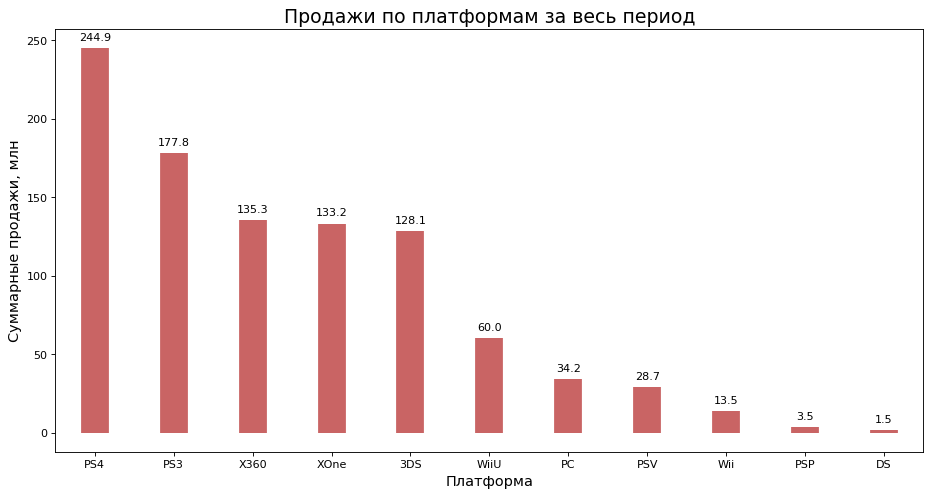

In [22]:
df_plot = df_actual.loc[:, ['platform', 'total_sales']].groupby('platform').sum()
df_plot.sort_values('total_sales', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(14,7), facecolor='white', dpi= 80)
ax.vlines(x=df_plot.index, ymin=0, ymax=df_plot.total_sales, color='firebrick', alpha=0.7, linewidth=25)


for i, sales in enumerate(df_plot.total_sales):
    ax.text(i, sales+5, round(sales, 1), horizontalalignment='center')

plt.title("Продажи по платформам за весь период", size=17)
plt.xlabel("Платформа",size=13)
plt.ylabel("Суммарные продажи, млн",size=13)

plt.show()

**Возьмем топ-5 платформ по количеству продаж и выделим самые перспективные**
<a id = "an_4"></a>

<a id='2'></a>

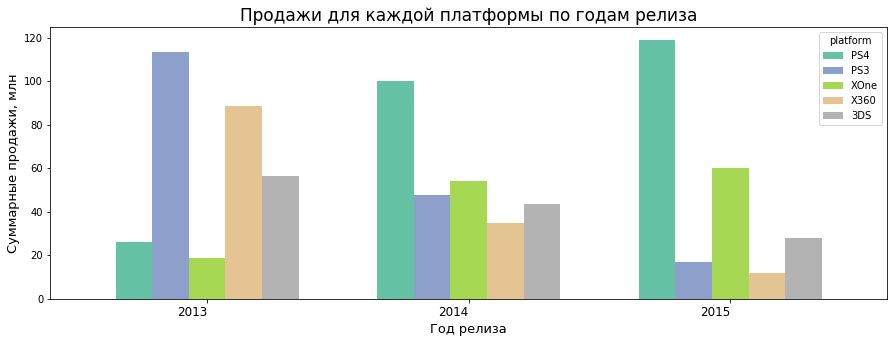

In [23]:
top_5 = ['PS4', 'PS3', 'XOne', 'X360', '3DS']
top5_platforms = df_actual.loc[:, ['platform', 'total_sales', 'year_of_release']].pivot_table(
                    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').loc[:, top_5]

top5_platforms.plot.bar(figsize=(15,5), width=0.7, colormap='Set2')
plt.title("Продажи для каждой платформы по годам релиза", size=17)
plt.xlabel("Год релиза",size=13)
plt.ylabel("Суммарные продажи, млн",size=13)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)

plt.show()

На диаграмме заметен рост продаж игр, выпускаемых на PS4 и XOne, соответственно PS3 и X360 теряют свою актуальность.

**Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

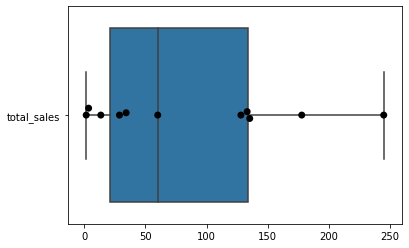

In [24]:
box = df_actual.groupby('platform')['total_sales','platform'].sum().reset_index()

ax = sns.boxplot(data=box, orient='h')
ax = sns.swarmplot(data=box, orient='h', size=7, color='black')

plt.show()

In [25]:
box.describe()

,total_sales
count,11.000000
mean,87.340909
std,81.193063
min,1.540000
25%,21.110000
50%,60.030000
75%,134.225000
max,244.890000


На графике видно, что больше половины платформ имеют суммарные продажи выше 60млн, это отобранные нами топ-5 платформ. Минимальные продажи 1.54млн, максимальные - 244.89. Выбросов нет, все значения уложились в  +- полтора межквартильных размаха.

**Посмотрим, как влияют на продажи внутри одной популярной платформы(PS4) отзывы пользователей и критиков.**
<a id = "an_5"></a>

In [26]:

def corr_by_score(df, platforms: list):
    
    for platform in platforms:
        
        
        dfp = df.query('platform == @platform')
        
        fig, ax = plt.subplots(figsize=(15, 7))
        ax.scatter(x = dfp['critic_score'], y = dfp['user_score'], s=dfp['total_sales']*25, edgecolors = 'darkblue', 
                   alpha=0.7)
        plt.xlabel("Рейтинг критиков", size=15)
        plt.ylabel("Рейтинг пользователей",size=15)
        plt.title("Влияние отзывов на продажи платформы %s" %platform, size=17, pad=15)

        plt.show()
        
        print('\n')
        
        dfp_c = dfp.loc[:, ['total_sales', 'critic_score', 'user_score']]
        plt.figure(figsize=(7,3))
        sns.heatmap(dfp_c.corr(), xticklabels=dfp_c.corr().columns, yticklabels=dfp_c.corr().columns, 
                    cmap='RdYlGn', center=0, annot=True)

        plt.title('Корреляция рейтингов и продаж платформы %s' %platform, fontsize=17, pad=20)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.show()
        
        print('\n' * 2)
        print('--' * 56)
        print('\n' * 2)

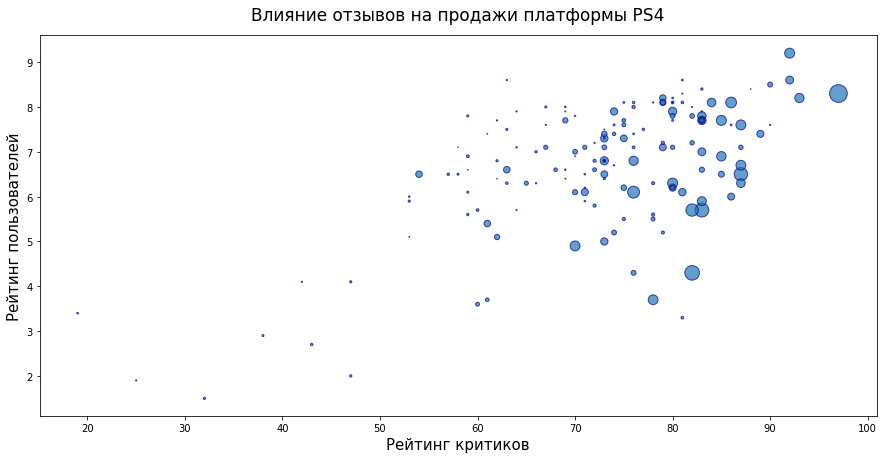

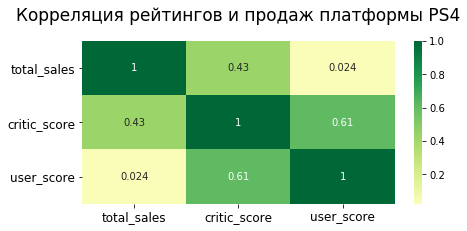




----------------------------------------------------------------------------------------------------------------





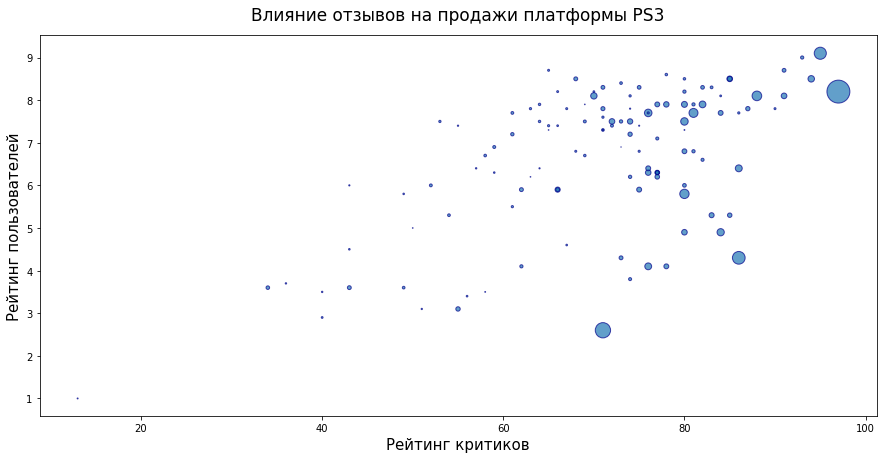

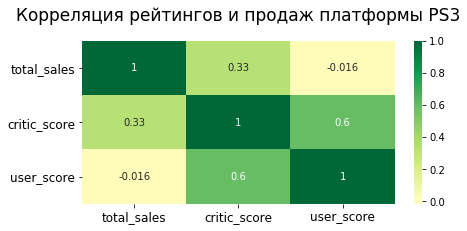




----------------------------------------------------------------------------------------------------------------





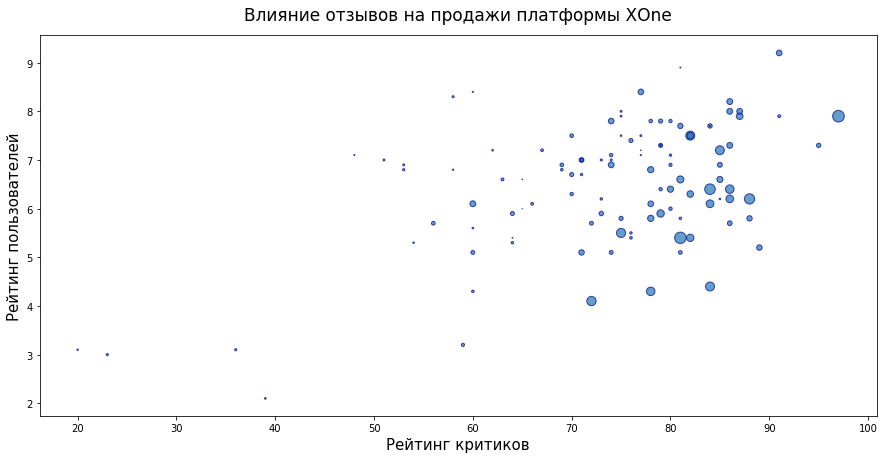

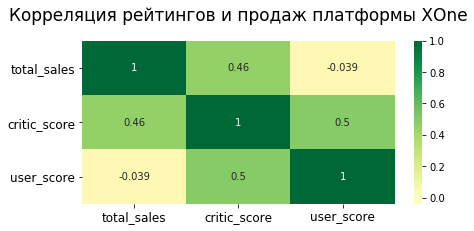




----------------------------------------------------------------------------------------------------------------





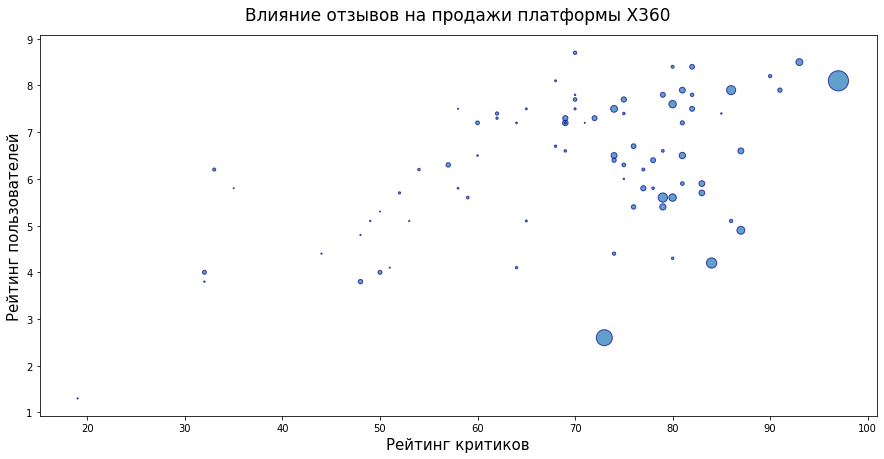

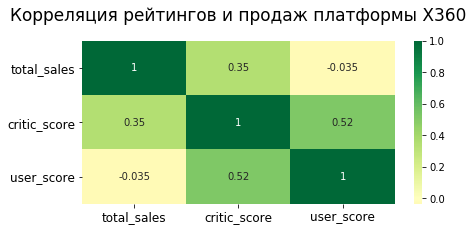




----------------------------------------------------------------------------------------------------------------





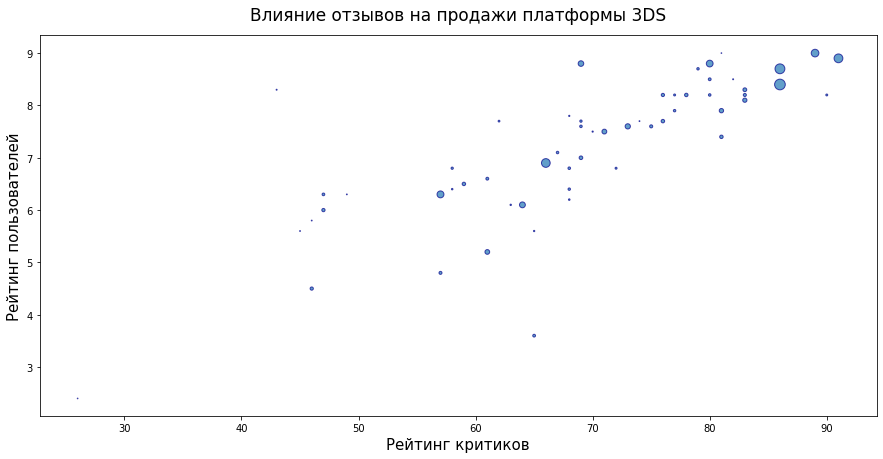

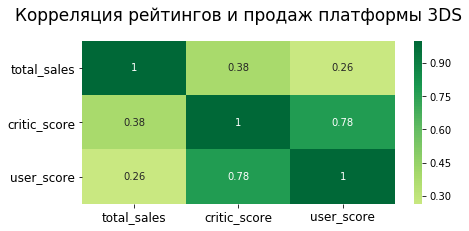




----------------------------------------------------------------------------------------------------------------





In [27]:
corr_by_score(df_actual, top_5)

Рейтинги оказывают влияние на количество продаж, это видно из диаграммы рассеяния. Причем рейтинг критиков имеет больший вес.  
Расчитанный коэффициент корреляции Пирсона показывает среднюю корреляцию между продажами и рейтингом критиков, а между продажами и рейтингом пользователей связи практически нет. 
Исключение - 3DS, зависимости от рейтинга критиков и рейтинга пользователей близки к друг другу и являются слабыми, скорее всего по причине меньшей популярности платформы.

**Рассмотрим распределение игр по жанрам и выделим жанры с высокими и низкими продажами.**
<a id = "an_6"></a>

In [28]:
by_genres = df_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
by_genres.sort_values(by='total_sales', ascending=False).reset_index()

,genre,total_sales
0,Action,291.76
1,Shooter,194.76
2,Role-Playing,127.71
3,Sports,127.16
4,Misc,60.22
5,Platform,39.40
6,Racing,37.10
7,Fighting,30.84
8,Simulation,19.87
9,Adventure,19.82


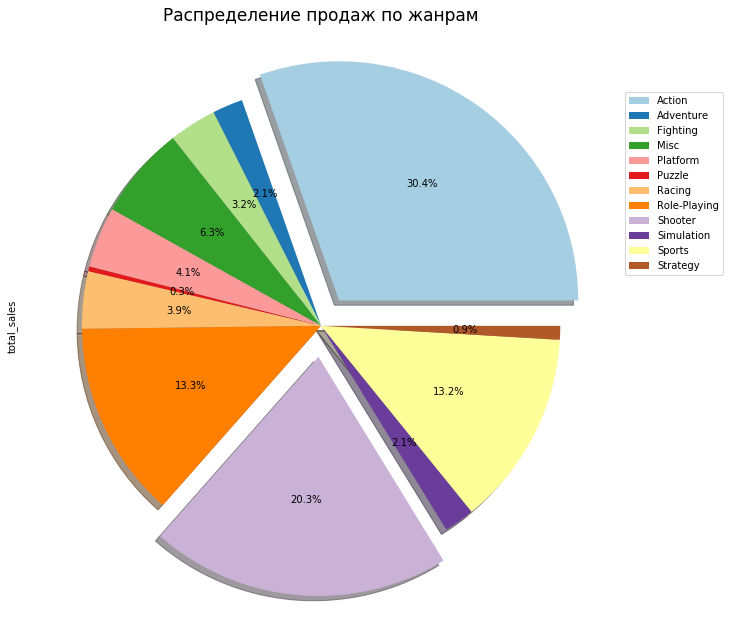

In [29]:
my_explode = (0.13, 0, 0, 0, 0, 0, 0, 0, 0.13, 0, 0, 0)
by_genres.plot(
    kind='pie', figsize=(16,11), legend=True, labeldistance=None, y='total_sales', explode=my_explode, shadow=True, 
    colormap='Paired', autopct='%1.1f%%')
plt.title('Распределение продаж по жанрам', size=17)
plt.legend(bbox_to_anchor=(1, 0.9), loc='upper left')

plt.show()

Самыми популярными и прибыльными являются жанры "Action" и "Shooter". Мало кто хочет играть в пазлы и стратегии, ведь в них нужно думать)

Провели исследовательский анализ данных, выяснили распределение релизов по годам и взяли только те, в которых выпускалось более 100 игр. Платформы оставили с продажами более 50млн копий.  
Узнали, что примерно за 3.5 года платформа становится популярной и исходя из этого отобрали актуальные данные для прогноза (2013-2015 года).  
Выделили топ-5 продаваемых платформ (PS4, PS3, XOne, X360, 3DS) и визуализировали зависимость продаж от рейтингов пользователей и критиков.  Оказалось, что продажи зависят от рецензий критиков.  


# 4. Портрет пользователя каждого региона
<a id = "regions"></a>

**Определим для каждого региона самые популярные платформы и жанры.**

In [30]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

regions = ['na_sales', 'eu_sales', 'jp_sales'] 
hist_platforms = pd.DataFrame()
hist_genres = pd.DataFrame()

for region in regions:
    
    frame = df_actual.loc[:, ['genre', 'platform', region, 'rating', 'total_sales']]
    
    df1 = frame.groupby('platform')[region, 'total_sales'].sum()
    df1['ratio, %'] = ((df1[region] / df1['total_sales']) * 100).round(1)
    df1 = df1.nlargest(5, region, keep='all').reset_index()
    df1.index += 1
    hist_platforms = hist_platforms.append(df1, sort=True)  
    
    df2 = frame.groupby('genre')[region].sum().to_frame()
    df2 = df2.nlargest(5, region, keep='all').reset_index()
    df2.index += 1
    hist_genres = hist_genres.append(df2, sort=True)
    
    display_side_by_side(df1,df2, titles=['Топ-5 платформ %.2s' %region.upper(), 
                                          'Топ-5 жанров %.2s' %region.upper()])  


Топ-5 платформ NA 
 
 
 
 platform 
 na_sales 
 total_sales 
 ratio, % 
 
 
 
 
 1 
 PS4 
 87.25 
 244.89 
 35.6 
 
 
 2 
 X360 
 80.97 
 135.28 
 59.9 
 
 
 3 
 XOne 
 78.85 
 133.17 
 59.2 
 
 
 4 
 PS3 
 62.83 
 177.83 
 35.3 
 
 
 5 
 3DS 
 34.06 
 128.11 
 26.6 
 
 
 Топ-5 жанров NA 
 
 
 
 genre 
 na_sales 
 
 
 
 
 1 
 Action 
 116.76 
 
 
 2 
 Shooter 
 93.50 
 
 
 3 
 Sports 
 57.73 
 
 
 4 
 Role-Playing 
 40.51 
 
 
 5 
 Misc 
 26.73

Топ-5 платформ EU 
 
 
 
 platform 
 eu_sales 
 total_sales 
 ratio, % 
 
 
 
 
 1 
 PS4 
 109.31 
 244.89 
 44.6 
 
 
 2 
 PS3 
 66.55 
 177.83 
 37.4 
 
 
 3 
 XOne 
 41.96 
 133.17 
 31.5 
 
 
 4 
 X360 
 41.81 
 135.28 
 30.9 
 
 
 5 
 3DS 
 28.63 
 128.11 
 22.3 
 
 
 Топ-5 жанров EU 
 
 
 
 genre 
 eu_sales 
 
 
 
 
 1 
 Action 
 107.45 
 
 
 2 
 Shooter 
 71.96 
 
 
 3 
 Sports 
 48.51 
 
 
 4 
 Role-Playing 
 32.69 
 
 
 5 
 Misc 
 19.38

Топ-5 платформ JP 
 
 
 
 platform 
 jp_sales 
 total_sales 
 ratio, % 
 
 
 
 
 1 
 3DS 
 59.78 
 128.11 
 46.7 
 
 
 2 
 PS3 
 22.05 
 177.83 
 12.4 
 
 
 3 
 PSV 
 15.03 
 28.74 
 52.3 
 
 
 4 
 PS4 
 10.22 
 244.89 
 4.2 
 
 
 5 
 WiiU 
 10.21 
 60.03 
 17.0 
 
 
 Топ-5 жанров JP 
 
 
 
 genre 
 jp_sales 
 
 
 
 
 1 
 Role-Playing 
 44.43 
 
 
 2 
 Action 
 33.42 
 
 
 3 
 Misc 
 8.16 
 
 
 4 
 Fighting 
 6.90 
 
 
 5 
 Shooter 
 5.55

В столбце "ratio, %" указана доля региональных продаж платформы в суммарных общих продажах.  
  
  
В Северной Америке первое место среди платформ по продажам поделили практически поровну между собой PS4, X360 и XOne, но продажи Xbox здесь составляют бОльшую часть от общих продаж. Жанры "Action" и "Shooter" являются самыми популярными.   
  
  В Европе среди платформ лидирует PS4(почти половина от всех продаж платформы), на втором месте ее предшественник PS3. Недолюбливают европейцы почему-то Xbox. Жанры популярны те же, что и в Северной Америке.    
  
  Японцы как всегда выделяются. Большую часть рынка игр занимают продажи на платформе Nintendo 3DS, также они больше отдают предпочтение уже немного устаревшей PS3, чем PS4. Что касается жанров, тут они тоже отличились, предпочитают ролевые игры и экшн.
    
    

<a id = "reg_1"></a>

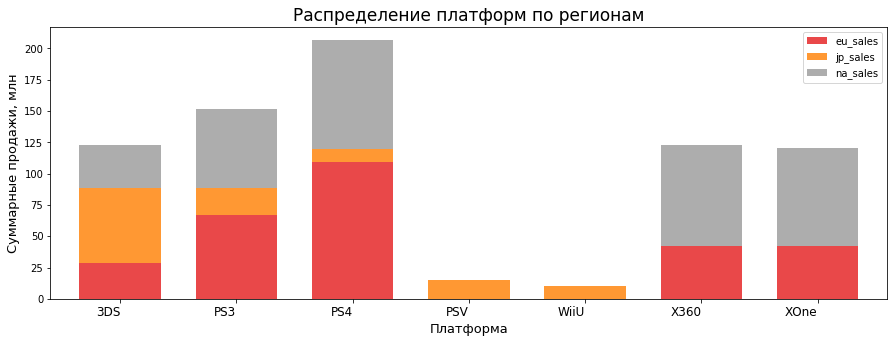

In [31]:
ax = hist_platforms.pivot_table(index='platform', values=regions, aggfunc='sum')
ax.plot.bar(figsize=(15,5), width=0.7, colormap='Set1', stacked=True, alpha=0.8)
plt.title("Распределение платформ по регионам", size=17)
plt.xlabel("Платформа",size=13)
plt.ylabel("Суммарные продажи, млн",size=13)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
plt.show()

<a id = "reg_2"></a>

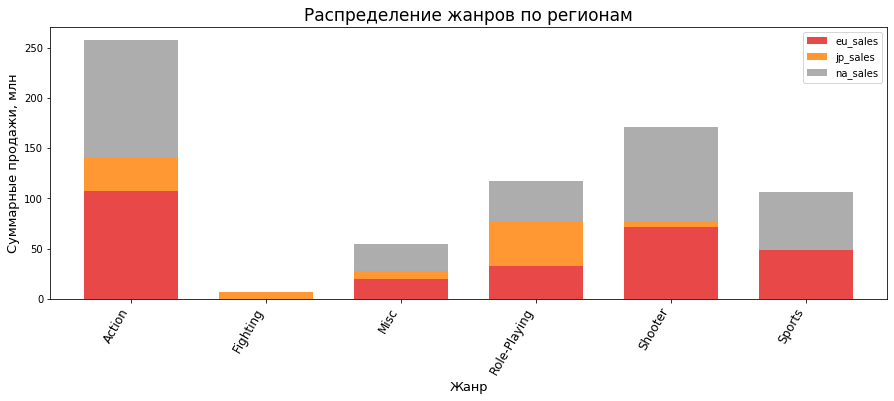

In [32]:
ax = hist_genres.pivot_table(index='genre', values=regions, aggfunc='sum')
ax.plot.bar(figsize=(15,5), width=0.7, colormap='Set1', alpha=0.8, stacked=True)
plt.title("Распределение жанров по регионам", size=17)
plt.xlabel("Жанр",size=13)
plt.ylabel("Суммарные продажи, млн",size=13)
plt.xticks(rotation=60, horizontalalignment='right', fontsize=12)
plt.show()

<a id = "reg_3"></a>

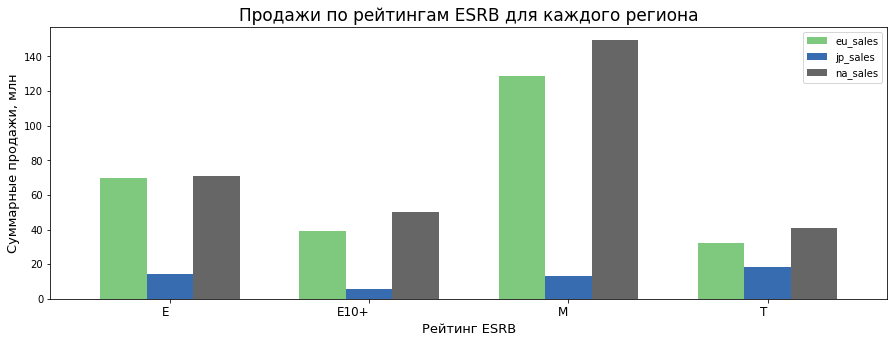

In [33]:
df3 = df_actual.pivot_table(index='rating', values=regions, aggfunc='sum')
df3.plot.bar(figsize=(15,5), width=0.7, colormap='Accent')
plt.title("Продажи по рейтингам ESRB для каждого региона", size=17)
plt.xlabel("Рейтинг ESRB",size=13)
plt.ylabel("Суммарные продажи, млн",size=13)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
plt.show()

В Европе и Северной Америке преобладают игры с рейтингом М, а в Японии - с рейтингом Т.

# 5. Проверка гипотез
<a id = "hypotheses"></a>

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
<a id = "hyp_1"></a>

*Нулевая гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
  
  *Альтернативная гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC различаются.  
  Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, используем Т-тест.

In [34]:
x_one = df_actual.loc[df_actual['platform'] == 'XOne', 'user_score']
pc = df_actual.loc[df_actual['platform'] == 'PC', 'user_score']

print(f'Средний пользовательский рейтинг Xbox One: {x_one.mean():.1f}')
print(f'Средний пользовательский рейтинг PC: {pc.mean():.1f}')

alpha = 0.05
results = st.ttest_ind(x_one, pc, equal_var = False, nan_policy='omit')

print(f'p-value: {results.pvalue}')

results.pvalue < alpha

Средний пользовательский рейтинг Xbox One: 6.5
Средний пользовательский рейтинг PC: 6.3
p-value: 0.2867036680187501


False

Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC немного различаются, с вероятностью в почти 29% такое или большее различие можно получить случайно.  
  Отвергнуть нулевую гипотезу мы не можем.  
  Можно сделать вывод, что пользовательские рейтинги не зависят от платформы и это логично, ведь оценку ставят игре.

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные.**
<a id = "hyp_2"></a>

*Нулевая гипотеза:* средние пользовательские рейтинги жанров Action и Sports равны.  
  
  *Альтернативная гипотеза:* средние пользовательские рейтинги жанров Action и Sports различаются.  
  Для проверки гипотезы используем Т-тест.

In [35]:
action = df_actual.loc[df_actual['genre'] == 'Action', 'user_score']
sports = df_actual.loc[df_actual['genre'] == 'Sports', 'user_score']

print(f'Средний пользовательский рейтинг жанра Action: {action.mean():.1f}')
print(f'Средний пользовательский рейтинг жанра Sports: {sports.mean():.1f}')

alpha = 0.05
results = st.ttest_ind(action, sports, equal_var = False, nan_policy='omit')

print(f'p-value: {results.pvalue}')

results.pvalue < alpha

Средний пользовательский рейтинг жанра Action: 6.9
Средний пользовательский рейтинг жанра Sports: 5.2
p-value: 3.5076737062535296e-19


True

Полученное значение p-value ниже заданного уровня значимости и мы отвергаем нулевую гипотезу в пользу альтернативной.  
  
  Средние пользовательские рейтинги жанров Action и Sports различаются. Возможно причина в том, что жанр Sports менее популярен и меньше выпускается игр низкого качества.

# 6. Общий вывод
<a id = "conclusion"></a>

 - Мы выяснили, что в среднем платформы живут 7 лет. РС является исключением, игры под него выходили всегда и будут выходить еще долгое время, но они не так популярны, как игры на консолях.  
    Популярность игры во многом зависит от популярности платформы, на которой она выходит.   
    На [диаграмме рассеяния](#1) и [гистограмме](#2) распределения продаж видно, что в данный момент набирают популярность две платформы. Это PS4 и XOne. Количество продаж PS4 за все время превышает продажи XOne практически в два раза.  
  
 - Также удалось узнать, что на продажи влияют отзывы критиков. После релиза игры они делают обзоры и формируют рейтинг, высокие значения которого могут дать хороший импульс для увеличения объема продаж.  
  
 - Самыми популярными являются жанры "Action" и "Shooter". Обычно в игре эти два жанра совмещаются. Пользователи хотят адреналина, драйва и стрельбы.  
   50% продаж PS4 приходится на Европу, XOne же лучше продается в Северной Америке (60% от суммарных продаж).  
   Японцы постоянно в движении, предпочитают переносные консоли (3DS, PSV) и играют на них в основном в RPG.
  
 - Так как Европа и Северная Америка схожи в предпочтениях по жанрам, то и рейтинг ESRB преобладает один(М).  
   "M" - один из самых желаемых рейтингов среди любителей условно "взрослых" проектов. В играх с таким рейтингом можно обнаружить много насилия (не обязательно жёсткого и не обязательно в большом количестве, рейтинг просто развязывает руки для возможности такого), нецензурную лексику, мрачную атмосферу. Самый популярный рейтинг, судя по продажам.  
  
  **Можно подвести итог: чтобы у игры были высокие шансы достичь успеха в 2017 году, она должна быть выпущена на двух платформах PS4 и XOne (если на одной, то PS4) в жанре "Action" или "Shooter", иметь высокий рейтинг у критиков и рейтинг ESRB - "М". Рекламные кампании для PS4 проводить предпочтительнее в  Европе, а для XOne - в Северной Америке.**
